<a href="https://colab.research.google.com/github/Samapti25/solar/blob/main/carringtonmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [ ]:
!git clone https://github.com/Samapti25/solar.git


Cloning into 'solar'...
fatal: could not read Username for 'https://github.com': No such device or address


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
!pip install astropy


In [ ]:
!pip install drms

In [ ]:
!pip install aiapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install sunpy[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.2/962.2 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 k

In [4]:
import os
from astropy.io import fits
import sunpy.map
from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label





In [5]:
folder_path = "/content/drive/MyDrive/data folder"
save_dir1="/content/drive/MyDrive/data folder/South hemisphere"
save_dir2= "/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data

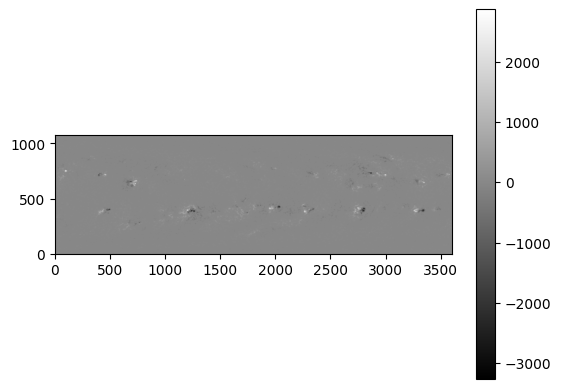

In [7]:
fig = plt.figure()
plt.imshow(data, origin="lower", cmap='gray')
plt.colorbar()

In [8]:
nx=data.shape[1]
ny=data.shape[0]
longitude=np.linspace(0,360,nx)
sin_lat=np.linspace(-1,1,ny)



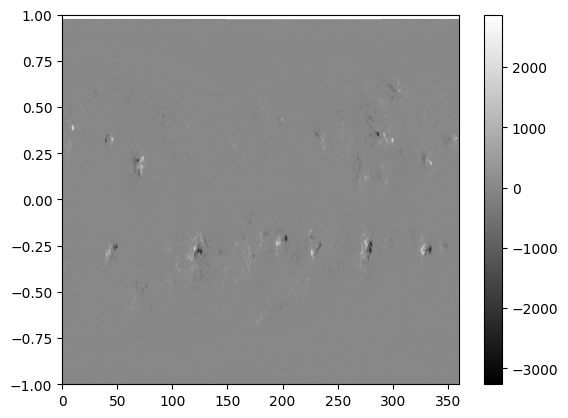

In [9]:
fig = plt.figure()
plt.imshow(data, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto")
plt.colorbar()

In [10]:
threshold=100
binary_mask=np.abs(data)>threshold

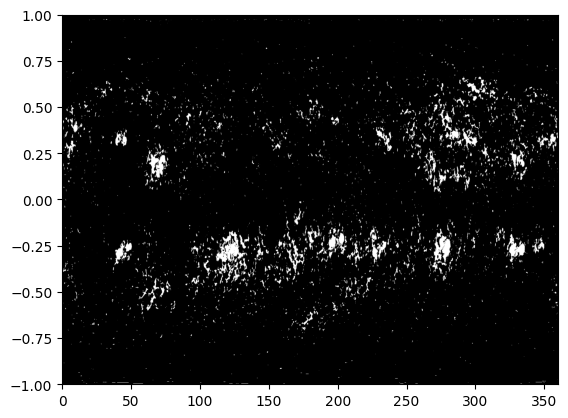

In [11]:
plt.imshow(binary_mask, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto"  )


In [12]:
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))

In [13]:
areathres=1000
mask_filtered = np.zeros_like(binary_mask)
print(mask_filtered)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [14]:
for i, size in enumerate(sizes):
  if size >=areathres:
    mask_filtered[labeled_array == (i + 1)] = 1


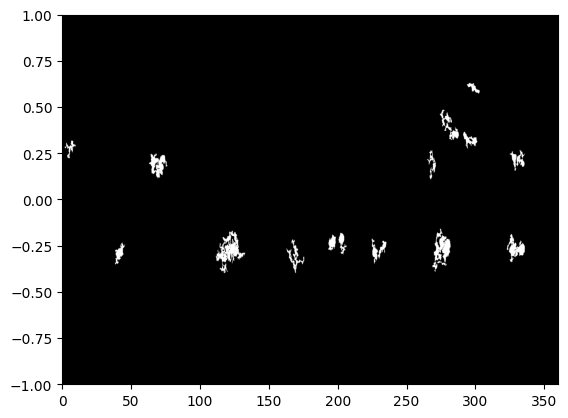

In [15]:
plt.imshow(mask_filtered, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect="auto" )


In [16]:
y_indices, x_indices = np.where(mask_filtered==1)

lat=sin_lat[y_indices]
lon=longitude[x_indices]
mask1=(lat<=0)& (lat>=-1)
SH_lat=lat[mask1]
SH_lon=lon[mask1]
mask2= (lat<=1) & (lat>=0)
NH_lat = lat[mask2]
NH_lon = lon[mask2]

sorted_indices1= np.argsort(SH_lon)
SHlon_sorted=SH_lon[sorted_indices1]
SHlat_sorted=SH_lat[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
print(output1)
sorted_indices2 = np.argsort(NH_lon)
NHlon_sorted= NH_lon[sorted_indices2]
NHlat_sorted = NH_lat[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
print(output2)



[[ 3.85106974e+01 -3.49397590e-01]
 [ 3.85106974e+01 -3.45690454e-01]
 [ 3.85106974e+01 -3.47544022e-01]
 ...
 [ 3.35893304e+02 -2.58572753e-01]
 [ 3.35893304e+02 -2.56719184e-01]
 [ 3.35993331e+02 -2.58572753e-01]]
[[2.00055571e+00 2.80815570e-01]
 [2.10058350e+00 2.77108434e-01]
 [2.10058350e+00 2.80815570e-01]
 ...
 [3.35693248e+02 1.93697868e-01]
 [3.35693248e+02 1.95551437e-01]
 [3.35693248e+02 2.41890639e-01]]


In [17]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

In [65]:
folder_path2="/content/drive/MyDrive/data folder/South hemisphere"
files = os.listdir(folder_path2)
txt_files = glob.glob(os.path.join(folder_path2, '*.txt'))
Y=[]
X=[]
Z=[]
for file in txt_files:
	print(file)


/content/drive/MyDrive/data folder/South hemisphere/ synop_Mr_0.1960_SH.txt


In [66]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      lon=float(parts[0])
      lat=float(parts[1])
      lon_rad = (lon*np.pi)/180
      y=-0.25+0.02*np.sin(lon_rad)
      Y.append(y)
      X.append(lon)
      Z.append(lat)


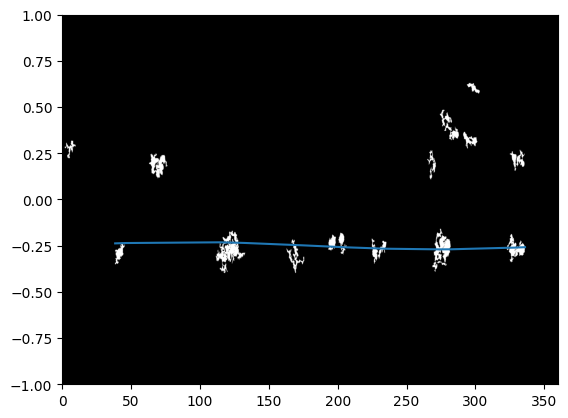

In [67]:

plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect="auto")
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(X,Y)




In [62]:
folder_path3="/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]
C=[]
for file in txt_files:
	print(file)

/content/drive/MyDrive/data folder/North hemisphere/ synop_Mr_0.1960_NH.txt


In [63]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      lon=float(parts[0])
      lat=float(parts[1])
      lon_rad = (lon*np.pi)/180
      y=0.25+0.02*np.sin(lon_rad)
      B.append(y)
      A.append(lon)
      C.append(lat)

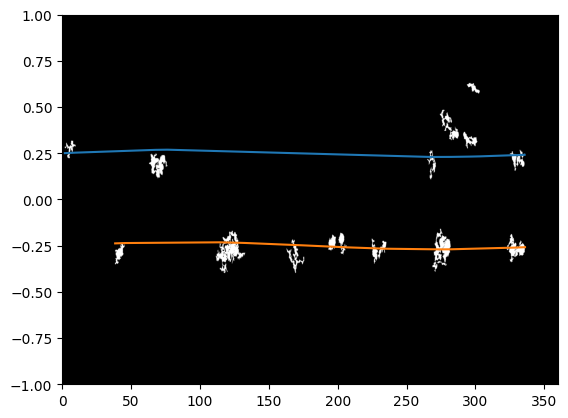

In [68]:
plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect="auto")
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(A,B)
plt.plot(X,Y)

In [ ]:
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=0.25+np.sin(X)

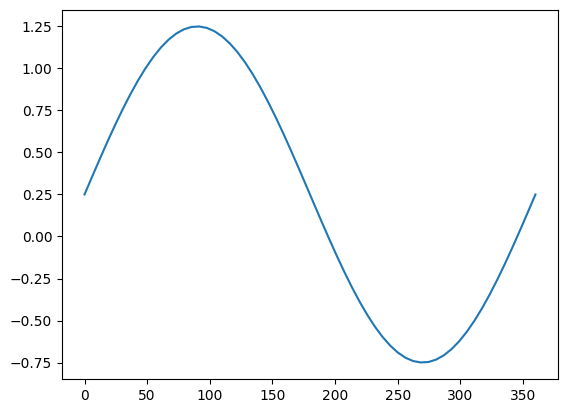

In [ ]:
plt.plot(x,y)